In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel('Las(2)_23 мая.xlsx', header = 0, sheet_name = 'Лист1') #header = 0 строка заголовков
data

,WELL,MD,Rhob
0,R4,2075.0,2.255
1,R4,2075.1,2.273
2,R4,2075.2,2.300
3,R4,2075.3,2.331
4,R4,2075.4,2.358
...,...,...,...
897,R1,2129.6,2.530
898,R1,2129.7,2.540
899,R1,2129.8,2.520
900,R1,2129.9,2.500


In [7]:
wells = data.groupby('WELL')
wells.head()

,WELL,MD,Rhob
0,R4,2075.0,2.255
1,R4,2075.1,2.273
2,R4,2075.2,2.300
3,R4,2075.3,2.331
4,R4,2075.4,2.358
401,R1,2080.0,2.500
402,R1,2080.1,2.510
403,R1,2080.2,2.510
404,R1,2080.3,2.490
405,R1,2080.4,2.480


In [8]:
wells.min()

,MD,Rhob
WELL,,
R1,2080.0,2.150
R4,2075.0,2.237


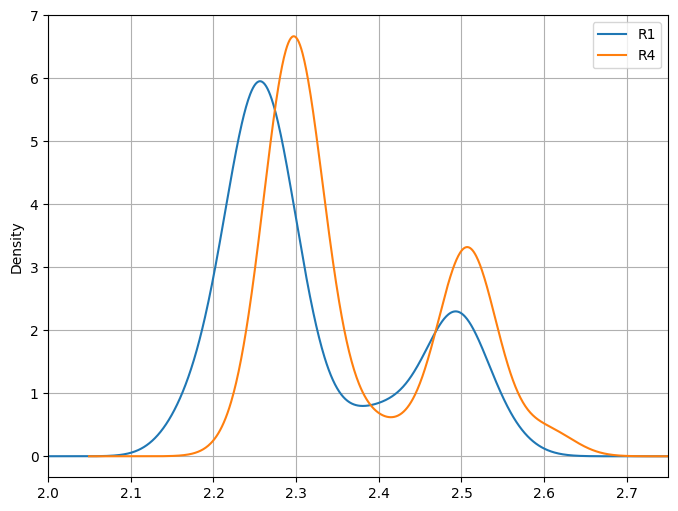

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in wells:
    df.Rhob.plot(kind ='kde', ax=ax, label=label)
    plt.xlim(2, 2.75)
plt.grid(True)
plt.legend()
#plt.savefig('before_normalisation.png', dpi=300)

## 95 and 5

In [10]:
gr_percentile_05 = data.groupby('WELL')['Rhob'].quantile(0.05)
print(gr_percentile_05)

WELL
R1    2.190
R4    2.273
Name: Rhob, dtype: float64


In [11]:
gr_percentile_95 = data.groupby('WELL')['Rhob'].quantile(0.95)
print(gr_percentile_95)

WELL
R1    2.510
R4    2.527
Name: Rhob, dtype: float64


In [12]:
data['05_PERC'] = data['WELL'].map(gr_percentile_05)
data['95_PERC'] = data['WELL'].map(gr_percentile_95)
data.describe()

,MD,Rhob,05_PERC,95_PERC
count,902.000000,902.000000,902.000000,902.000000
mean,2100.554324,2.344325,2.226899,2.517558
std,14.165634,0.111025,0.041267,0.008452
min,2075.000000,2.150000,2.190000,2.510000
25%,2088.725000,2.260000,2.190000,2.510000
50%,2100.000000,2.300000,2.190000,2.510000
75%,2111.275000,2.473750,2.273000,2.527000
max,2130.000000,2.612000,2.273000,2.527000


In [13]:
def normalise(curve, ref_low, ref_high, well_low, well_high):
    return ref_low + ((ref_high - ref_low) * ((curve - well_low) / (well_high - well_low)))

In [14]:
key_well_low = 2.19
key_well_high = 2.51

In [15]:
data['Rhob_NORM'] = data.apply(lambda x: normalise(x['Rhob'], key_well_low, key_well_high, 
                                                 x['05_PERC'], x['95_PERC']), axis=1)

In [16]:
data

,WELL,MD,Rhob,05_PERC,95_PERC,Rhob_NORM
0,R4,2075.0,2.255,2.273,2.527,2.167323
1,R4,2075.1,2.273,2.273,2.527,2.190000
2,R4,2075.2,2.300,2.273,2.527,2.224016
3,R4,2075.3,2.331,2.273,2.527,2.263071
4,R4,2075.4,2.358,2.273,2.527,2.297087
...,...,...,...,...,...,...
897,R1,2129.6,2.530,2.190,2.510,2.530000
898,R1,2129.7,2.540,2.190,2.510,2.540000
899,R1,2129.8,2.520,2.190,2.510,2.520000
900,R1,2129.9,2.500,2.190,2.510,2.500000


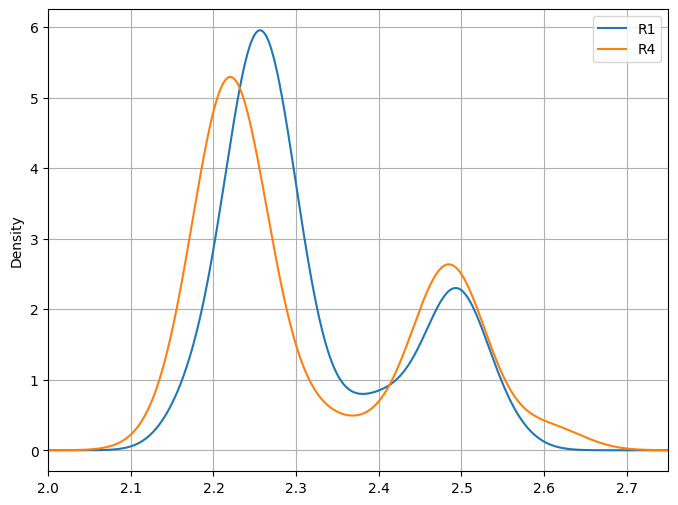

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in wells:
    df.Rhob_NORM.plot(kind ='kde', ax=ax, label=label)
    plt.xlim(2, 2.75)
plt.grid(True)
plt.legend()
#plt.savefig('after_normalisation.png', dpi=300)

In [40]:
df.to_excel('C:/Users/nik_c/OneDrive/Рабочий стол/Учеба/FDP/Нормализация/normdata_1488.xlsx')

## Z_Score

In [194]:
gr_mean = data.groupby('WELL')['Rhob'].mean()
print(gr_mean)

WELL
R1    2.251374
R2    2.454604
Name: Rhob, dtype: float64


In [195]:
gr_std = data.groupby('WELL')['Rhob'].std()
print(gr_std)

WELL
R1    0.038125
R2    0.034401
Name: Rhob, dtype: float64


In [200]:
data['Mean'] = data['WELL'].map(gr_mean)
data['Std'] = data['WELL'].map(gr_std)
data.describe()

,DEPT,Rhob,05_PERC,95_PERC,Rhob_NORM,Rhob_NORM_Z,Mean,Std
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,2096.806925,2.278396,2.211230,2.329737,2.247711,0.708777,2.278396,0.037630
std,21.984112,0.078670,0.079859,0.076043,0.039185,2.063485,0.069100,0.001266
min,2039.200000,2.150000,2.180000,2.300000,2.150000,-2.658988,2.251374,0.034401
25%,2090.700000,2.240000,2.180000,2.300000,2.230000,-0.298334,2.251374,0.038125
50%,2101.300000,2.260000,2.180000,2.300000,2.250000,0.226255,2.251374,0.038125
75%,2112.300000,2.290000,2.180000,2.300000,2.270000,1.013140,2.251374,0.038125
max,2124.000000,2.535000,2.414875,2.523650,2.390000,7.439366,2.454604,0.038125


In [209]:
def normalise_Z(curve, ref_mean, ref_std):
    return ((curve-ref_mean)/ref_std)

key_well_mean = 2.251374
key_well_std = 0.038125

data['Rhob_NORM_Z'] = data.apply(lambda x: normalise_Z(x['Rhob'], x['Mean'], x['Std']), axis=1)

In [210]:
data

,WELL,DEPT,Rhob,05_PERC,95_PERC,Rhob_NORM,Rhob_NORM_Z,Mean,Std,25_PERC,75_PERC,Rhob_NORM_25
0,R1,2086.5,2.2900,2.180000,2.30000,2.290000,1.013132,2.251374,0.038125,2.23000,2.280000,2.290000
1,R1,2086.6,2.2600,2.180000,2.30000,2.260000,0.226258,2.251374,0.038125,2.23000,2.280000,2.260000
2,R1,2086.7,2.2400,2.180000,2.30000,2.240000,-0.298325,2.251374,0.038125,2.23000,2.280000,2.240000
3,R1,2086.8,2.2200,2.180000,2.30000,2.220000,-0.822908,2.251374,0.038125,2.23000,2.280000,2.220000
4,R1,2086.9,2.2100,2.180000,2.30000,2.210000,-1.085200,2.251374,0.038125,2.23000,2.280000,2.210000
...,...,...,...,...,...,...,...,...,...,...,...,...
356,R2,2054.2,2.5060,2.414875,2.52365,2.280528,1.494005,2.454604,0.034401,2.42775,2.476375,2.310463
357,R2,2054.4,2.5165,2.414875,2.52365,2.292112,1.799232,2.454604,0.034401,2.42775,2.476375,2.321260
358,R2,2054.6,2.5275,2.414875,2.52365,2.304247,2.118993,2.454604,0.034401,2.42775,2.476375,2.332571
359,R2,2054.8,2.5345,2.414875,2.52365,2.311970,2.322473,2.454604,0.034401,2.42775,2.476375,2.339769


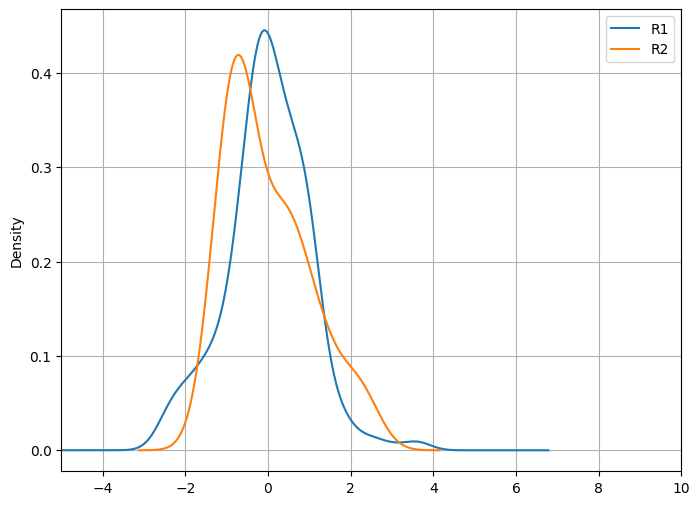

In [211]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in wells:
    df.Rhob_NORM_Z.plot(kind ='kde', ax=ax, label=label)
    plt.xlim(-5, 10)
plt.grid(True)
plt.legend()
#plt.savefig('after_normalisation.png', dpi=300)

## 75 and 25

In [18]:
gr_percentile_25 = data.groupby('WELL')['Rhob'].quantile(0.25)
gr_percentile_75 = data.groupby('WELL')['Rhob'].quantile(0.75)
print(gr_percentile_25)
print(gr_percentile_75)
data['25_PERC'] = data['WELL'].map(gr_percentile_25)
data['75_PERC'] = data['WELL'].map(gr_percentile_75)

WELL
R1    2.240
R4    2.294
Name: Rhob, dtype: float64
WELL
R1    2.420
R4    2.498
Name: Rhob, dtype: float64


In [19]:
def normalise(curve, ref_low, ref_high, well_low, well_high):
    return ref_low + ((ref_high - ref_low) * ((curve - well_low) / (well_high - well_low)))

key_well_low = 2.24
key_well_high = 2.42

data['Rhob_NORM_25'] = data.apply(lambda x: normalise(x['Rhob'], key_well_low, key_well_high, 
                                                 x['25_PERC'], x['75_PERC']), axis=1)

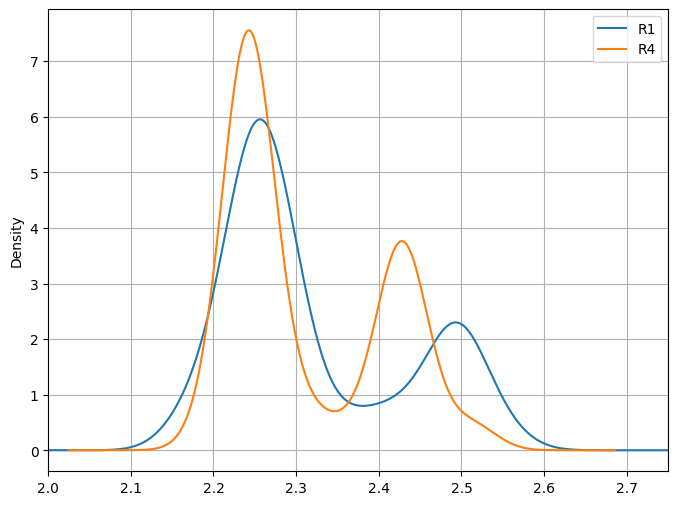

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in wells:
    df.Rhob_NORM_25.plot(kind ='kde', ax=ax, label=label)
    plt.xlim(2, 2.75)
plt.grid(True)
plt.legend()
#plt.savefig('after_normalisation.png', dpi=300)

In [208]:
df.to_excel('C:/Users/nik_c/OneDrive/Рабочий стол/Учеба/FDP/Нормализация/normdata_25_75.xlsx')